In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('pivo.csv')

In [3]:
print(data.head())

   CSU_ID                              ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  \
0  213201  Pivo výčepní, světlé, lahvové [0,5 l]  2020      1          11.78   
1  213201  Pivo výčepní, světlé, lahvové [0,5 l]  2020      2          11.46   
2  213201  Pivo výčepní, světlé, lahvové [0,5 l]  2020      3          12.07   
3  213201  Pivo výčepní, světlé, lahvové [0,5 l]  2020      4          11.35   
4  213201  Pivo výčepní, světlé, lahvové [0,5 l]  2020      5          11.90   

   ROHLIK_AVG_PRICE  KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0         18.416129        26.736253         19.777969             -6.636129   
1         18.400000        26.826433         19.659841             -6.940000   
2         18.609434        26.029914         19.654983             -6.539434   
3         19.524260        27.679758         19.450369             -8.174260   
4         19.566667        28.854463         19.004101             -7.666667   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FR

In [4]:
data = data[['YEAR', 'MONTH', 'ITESCO_AVG_PRICE']]

In [5]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE
0  2020      1         19.777969
1  2020      2         19.659841
2  2020      3         19.654983
3  2020      4         19.450369
4  2020      5         19.004101


In [6]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [7]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2020      1         19.777969     2020/1
1  2020      2         19.659841     2020/2
2  2020      3         19.654983     2020/3
3  2020      4         19.450369     2020/4
4  2020      5         19.004101     2020/5


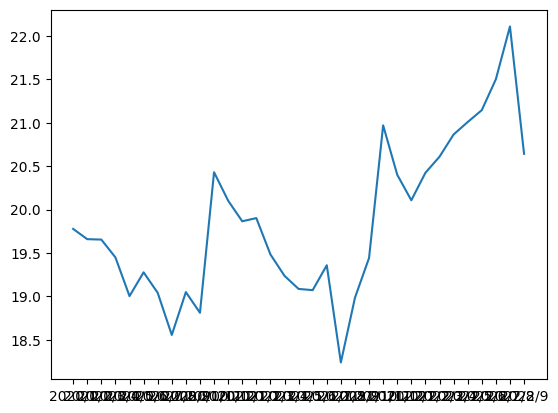

In [8]:
plt.plot(data['YEAR_MONTH'], data['ITESCO_AVG_PRICE'])
plt.show()

In [9]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['ITESCO_AVG_PRICE']]

In [10]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [12]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [13]:
X_val['ITESCO_AVG_PRICE'] = y_val

In [14]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [15]:
print(X_val.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2022     10         20.813451    2022/10
1  2022     11         20.847287    2022/11
2  2022     12         20.881123    2022/12
3  2023      1         21.264406     2023/1
4  2023      2         21.298242     2023/2


In [16]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,ITESCO_AVG_PRICE,YEAR_MONTH
28,2022,5,21.008266,2022/5
29,2022,6,21.145088,2022/6
30,2022,7,21.500766,2022/7
31,2022,8,22.108334,2022/8
32,2022,9,20.642365,2022/9
0,2022,10,20.813451,2022/10
1,2022,11,20.847287,2022/11
2,2022,12,20.881123,2022/12
3,2023,1,21.264406,2023/1
4,2023,2,21.298242,2023/2


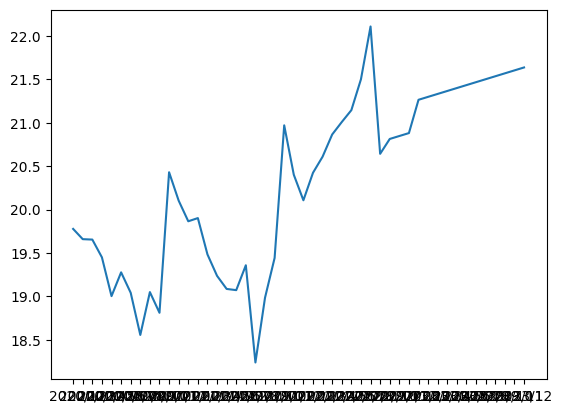

In [17]:
plt.plot(df['YEAR_MONTH'], df['ITESCO_AVG_PRICE'])
plt.show()